# Ejercicios BeautifulSoup

1. Escribe una función llamada scrape_coches_ocasion que acepta una URL como argumento y devuelve un DataFrame de pandas con información sobre coches de ocasión

Realizará una solicitud HTTP GET a la siguiente url

In [1]:
from bs4 import BeautifulSoup
import requests
# -----------------------------------------------------------------------
import pandas as pd
# -----------------------------------------------------------------------
import re

In [2]:
url_coche = 'https://www.ocasionplus.com/coches-ocasion?type%3DCAR%26sort%3DFECHAOP_DESC%26page%3D2'

res_coche = requests.get(url_coche)

res_coche.status_code

200

b'<!DOCTYPE html><html><head><meta charSet="UTF-8" class="next-head"/><title class="next-head">Coches de segunda mano, ocasi\xc3\xb3n y seminuevos | OcasionPlus</title><meta name="description" content="4000 coches de ocasi\xc3\xb3n y segunda mano con descuentos de hasta 6000\xe2\x82\xac, la mejor relaci\xc3\xb3n calidad-precio garantizada." class="next-head"/><meta name="robots" content="noindex, follow, noarchive" class="next-head"/><meta name="viewport" content="width=device-width, initial-scale=1.0" class="next-head"/><link rel="shortcut icon" href="/static/favicon/favicon.ico" type="image/x-icon" class="next-head"/><link rel="apple-touch-icon" sizes="180x180" href="/static/favicon/apple-touch-icon.png" class="next-head"/><link rel="icon" type="image/png" sizes="32x32" href="/static/favicon/favicon-32x32.png" class="next-head"/><link rel="icon" type="image/png" sizes="194x194" href="/static/favicon/favicon-194x194.png" class="next-head"/><link rel="icon" type="image/png" sizes="192x
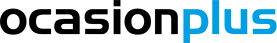

In [3]:
res_coche.content

In [4]:
sopa_coche = BeautifulSoup(res_coche.content, 'html.parser')

<!DOCTYPE html>
<html>
 <head>
  <meta charset="utf-8" class="next-head"/>
  <title class="next-head">
   Coches de segunda mano, ocasión y seminuevos | OcasionPlus
  </title>
  <meta class="next-head" content="4000 coches de ocasión y segunda mano con descuentos de hasta 6000€, la mejor relación calidad-precio garantizada." name="description"/>
  <meta class="next-head" content="noindex, follow, noarchive" name="robots"/>
  <meta class="next-head" content="width=device-width, initial-scale=1.0" name="viewport"/>
  <link class="next-head" href="/static/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
  <link class="next-head" href="/static/favicon/apple-touch-icon.png" rel="apple-touch-icon" sizes="180x180"/>
  <link class="next-head" href="/static/favicon/favicon-32x32.png" rel="icon" sizes="32x32" type="image/png"/>
  <link class="next-head" href="/static/favicon/favicon-194x194.png" rel="icon" sizes="194x194" type="image/png"/>
  <link class="next-head" href="/static/f
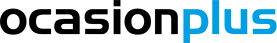

In [5]:
print(sopa_coche.prettify())

Extraer nombre de los coches, los precios rebajados, los precios originales,  la información de los kilometros

In [11]:
coches_nombre = sopa_coche.find_all('h2')[1:-1]

In [12]:
coches_nombre

[<h2 style="overflow-x:hidden">Volkswagen Golf 1.6 FSI Sportline (115CV)</h2>,
 <h2 style="overflow-x:hidden">Toyota Auris 1.6 VVT-I Advance  (132 CV)</h2>,
 <h2 style="overflow-x:hidden">Nissan Primastar 2.0 dCi L2H1 Go  (110 CV)</h2>,
 <h2 style="overflow-x:hidden">SEAT Leon 1.6 TDI S&amp;S Style DSG (115 CV)</h2>,
 <h2 style="overflow-x:hidden">Renault Megane Sport Tourer Bose Blue dCi (115 CV)</h2>,
 <h2 style="overflow-x:hidden">Hyundai ix35 1.6 GDi Klass 4x2 (135 CV)</h2>,
 <h2 style="overflow-x:hidden">Nissan Juke 1.6 DIG-T Tekna Xtronic (190 CV)</h2>,
 <h2 style="overflow-x:hidden">Peugeot 5008 1.6 HDI Allure FAP 7 Plazas (115 CV)</h2>,
 <h2 style="overflow-x:hidden">BMW Serie 1 118i (136 CV) PACK M</h2>,
 <h2 style="overflow-x:hidden">MINI MINI Countryman One D (116 CV)</h2>,
 <h2 style="overflow-x:hidden">Renault Megane Limited Blue dCi (115 CV)</h2>,
 <h2 style="overflow-x:hidden">Mercedes-Benz Clase GLA Clase GLA 200 Style (156 CV)</h2>,
 <h2 style="overflow-x:hidden">SEAT 

In [19]:
nombres_coches = []
for el in coches_nombre:
    nombres_coches.append(el.text)


print(nombres_coches)

['Volkswagen Golf 1.6 FSI Sportline (115CV)', 'Toyota Auris 1.6 VVT-I Advance  (132 CV)', 'Nissan Primastar 2.0 dCi L2H1 Go  (110 CV)', 'SEAT Leon 1.6 TDI S&S Style DSG (115 CV)', 'Renault Megane Sport Tourer Bose Blue dCi (115 CV)', 'Hyundai ix35 1.6 GDi Klass 4x2 (135 CV)', 'Nissan Juke 1.6 DIG-T Tekna Xtronic (190 CV)', 'Peugeot 5008 1.6 HDI Allure FAP 7 Plazas (115 CV)', 'BMW Serie 1 118i (136 CV) PACK M', 'MINI MINI Countryman One D (116 CV)', 'Renault Megane Limited Blue dCi (115 CV)', 'Mercedes-Benz Clase GLA Clase GLA 200 Style (156 CV)', 'SEAT Leon ST 1.2 TSI S&S Reference (110 CV)', 'Citroen C4 Picasso 1.6 HDi 115cv Seduction', 'Renault Captur Zen Energy dCi (90 CV) Ecoleader', 'Subaru Impreza 1.6 GLP Executive AWD CVT Lineartronic (114 CV)', 'Fiat 500L Pop Star 1.4 16v (95CV)', 'Dacia Logan MCV Laureate TCE (90 CV)', 'Citroen C5 Aircross BlueHdi 130 S&S Shine (131 CV)', 'Peugeot Rifter BlueHDi 130 Standard EAT8 (130 CV) GT Line']


In [25]:
precios_totales = sopa_coche.find_all('span', {'class': 'price'})

In [22]:
precios_originales = sopa_coche.find_all('span', {'class': 'priceLast'})

In [34]:
lista_precios_totales = []
for el in precios_totales:
    precio = el.text
    precio2 = precio.split('€')
    precio_limpio = precio2[0].replace('.', '')
    lista_precios_totales.append(precio_limpio)
    

In [35]:
lista_precios_totales

['6550',
 '8990',
 '27136',
 '15636',
 '16172',
 '10990',
 '15363',
 '7990',
 '18636',
 '16500',
 '12454',
 '19850',
 '11809',
 '13490',
 '10900',
 '14409',
 '11627',
 '9000',
 '16900',
 '21354']

In [23]:
precios_originales

[<span class="jsx-2870186023 priceLast">29.850<!-- -->€</span>,
 <span class="jsx-2870186023 priceLast">17.200<!-- -->€</span>,
 <span class="jsx-2870186023 priceLast">17.790<!-- -->€</span>,
 <span class="jsx-2870186023 priceLast">16.900<!-- -->€</span>,
 <span class="jsx-2870186023 priceLast">20.500<!-- -->€</span>,
 <span class="jsx-2870186023 priceLast">18.150<!-- -->€</span>,
 <span class="jsx-2870186023 priceLast">13.700<!-- -->€</span>,
 <span class="jsx-2870186023 priceLast">12.990<!-- -->€</span>,
 <span class="jsx-2870186023 priceLast">11.990<!-- -->€</span>,
 <span class="jsx-2870186023 priceLast">15.850<!-- -->€</span>,
 <span class="jsx-2870186023 priceLast">12.790<!-- -->€</span>,
 <span class="jsx-2870186023 priceLast">9.900<!-- -->€</span>,
 <span class="jsx-2870186023 priceLast">18.590<!-- -->€</span>,
 <span class="jsx-2870186023 priceLast">23.490<!-- -->€</span>]

In [36]:
lista_precios_originales = []
for el in precios_originales:
    precio = el.text
    precio2 = precio.split('€')
    precio_limpio = precio2[0].replace('.', '')
    lista_precios_originales.append(precio_limpio)

In [37]:
lista_precios_originales

['29850',
 '17200',
 '17790',
 '16900',
 '20500',
 '18150',
 '13700',
 '12990',
 '11990',
 '15850',
 '12790',
 '9900',
 '18590',
 '23490']

In [58]:
datos = sopa_coche.find_all('span', {'class': 'detail'})

In [68]:
datos

[<span class="jsx-3960002075 detail big"><img alt="Fecha Matriculación" class="jsx-3960002075 icon" height="22px" src="https://d2vub9o4tqpvne.cloudfront.net/LsD-JDSSgkhBX7eJ28Z8z_jGoxe8QTmkU6st1MtZpyA/icon/aHR0cHM6Ly9nb3AtZ2FsbGVyeS1kZXYuczMuZXUtd2VzdC0xLmFtYXpvbmF3cy5jb20vb2Nhc2lvbnBsdXMvc3RhdGljL2ljb25zL09QLUlDT05PUy1jYWxlbmRhcmlvLnBuZw" width="25px"/>04/2004</span>,
 <span class="jsx-3960002075 detail big"><img alt="KM" class="jsx-3960002075 icon" height="22px" src="https://d2vub9o4tqpvne.cloudfront.net/7QUTp-181ROLpTllxjLyS9231VvjQgnLQ9zLi6gtR-c/icon/aHR0cHM6Ly9nb3AtZ2FsbGVyeS1kZXYuczMuZXUtd2VzdC0xLmFtYXpvbmF3cy5jb20vb2Nhc2lvbnBsdXMvc3RhdGljL2ljb25zL09QLUlDT05PUy1raWxvbWV0cmFqZS1ncmlzLnBuZw" width="25px"/>87.433<!-- --> km</span>,
 <span class="jsx-3960002075 detail big"><img alt="Combustible" class="jsx-3960002075 icon" height="22px" src="https://d2vub9o4tqpvne.cloudfront.net/ZxWvafD3gA4OZaCrp7xDqYAFAzTGylYu5kFeuVUsvIw/icon/aHR0cHM6Ly9nb3AtZ2FsbGVyeS1kZXYuczMuZXUtd2VzdC0xLmFtYXpvb

In [69]:
datos[1]

<span class="jsx-3960002075 detail big"><img alt="KM" class="jsx-3960002075 icon" height="22px" src="https://d2vub9o4tqpvne.cloudfront.net/7QUTp-181ROLpTllxjLyS9231VvjQgnLQ9zLi6gtR-c/icon/aHR0cHM6Ly9nb3AtZ2FsbGVyeS1kZXYuczMuZXUtd2VzdC0xLmFtYXpvbmF3cy5jb20vb2Nhc2lvbnBsdXMvc3RhdGljL2ljb25zL09QLUlDT05PUy1raWxvbWV0cmFqZS1ncmlzLnBuZw" width="25px"/>87.433<!-- --> km</span>

In [77]:
type(datos)

bs4.element.ResultSet

In [78]:
lista_km = []
for dato in datos:
    '''lista_prov = []
    lista_prov.append(dato.text)
    print(dato.text)'''
    if 'km' in dato:
        print(dato)
    


In [50]:
kilometros = datos.find_all('KM', {'class':'jsx-3960002075'})

AttributeError: ResultSet object has no attribute 'find_all'. You're probably treating a list of elements like a single element. Did you call find_all() when you meant to call find()?